<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week12/CNN_GermanTrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#CNN German Traffic Sign

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Fungsi dari masing-masing Library yang digunakan:
1.   import pandas as pd: Digunakan untuk manipulasi dan analisis data.
1.   import numpy as np:D igunakan untuk operasi numerik yang efisien.
1.   import tensorflow as tf: Digunakan untuk mengembangkan dan melatih model machine learning.
1.   from keras.models import Sequential, load_model: Digunakan untuk membangun model secara sekuensial, sementara load_model digunakan untuk memuat model yang telah disimpan sebelumnya.
2.   from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D: Digunakan dalam model keras, seperti Conv2D (layer konvolusi 2D), Dense (layer fully connected), Flatten (mengubah array multidimensi menjadi vektor), Dropout (mencegah overfitting), dan MaxPool2D (layer pooling).
2.   from sklearn.model_selection import train_test_split: Digunakan untuk membagi data menjadi subset pelatihan dan pengujian.
2.   import pickle: Mengimpor pustaka pickle. Digunakan untuk serialisasi dan deserialisasi objek Python.
1.   import seaborn as sns: Visualisasi data yang berfungsi untuk membuat plot yang lebih menarik dan informatif.
2.   import matplotlib: Visualisasi data yang umum digunakan dalam Python.
1.   import matplotlib.pyplot as plt: Menyediakan antarmuka untuk membuat plot menggunakan matplotlib.







In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Menghubungkan dan mengakses Google Drive di Google Colab.

In [4]:
training_file = "/content/drive/MyDrive/Machine Learning/German Traffic/train.p"
testing_file = "/content/drive/MyDrive/Machine Learning/German Traffic/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print("Data loaded")

Data loaded


Kode program memuat data pelatihan dan pengujian dari file pickle yang tersimpan di Google Drive. Dengan menggunakan modul pickle, program membuka file pickle yang ditentukan, memuat data pelatihan ke dalam variabel train, dan memuat data pengujian ke dalam variabel test. Setelah data berhasil dimuat, akan muncul output "Data loaded" sebagai tanda bahwa proses pemuatan data telah selesai.

In [5]:
sign_name_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/German Traffic/signname.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


Kode program file CSV dari path yang ditentukan. Kemudian, kolom 'SignName' dari DataFrame sign_name_df diambil sebagai array numpy dan disimpan dalam variabel SIGN_NAMES. Lalu indeks DataFrame sign_name_df diubah menjadi kolom 'ClassId' menggunakan metode set_index('ClassId'). Lalu DataFrame sign_name_df diambil 10 baris pertamanya menggunakan metode head(10).

Dengan melakukan ini, program memuat data dari file CSV yang berisi nama-nama tanda lalu lintas, menyimpannya dalam variabel SIGN_NAMES, dan mengubah DataFrame sign_name_df agar indeksnya menjadi 'ClassId'.

In [6]:
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
# Define features and labels for training data
X, y = train['features'], train['labels']

# Converting lists into numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

# Define the features and labels for testing data
X_test, y_test = test['features'], test['labels']

# Converting lists into numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


Kode program menentukan fitur dan label dari data pelatihan (train) dan mengonversinya menjadi array numpy. Lalu bentuk (shape) dari array fitur (data) dan array label (labels) dicetak untuk memeriksa dimensi data pelatihan. Lalu kode tersebut mendefinisikan fitur dan label untuk data pengujian (test) dan mengonversinya menjadi array numpy. Bentuk (shape) dari array fitur pengujian (X_test) dan array label pengujian (y_test) juga dicetak untuk memeriksa dimensi data pengujian. Kesimpulannya, program mempersiapkan fitur dan label untuk data pelatihan dan pengujian, serta mengonversinya menjadi array numpy untuk digunakan dalam proses pelatihan dan evaluasi model.

In [8]:
X, y = train['features'], train['labels']

In [9]:
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

(34799, 32, 32, 3) (34799,)


In [10]:
X_test, y_test = test['features'], test['labels']

In [11]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630,)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


Program membagi data pelatihan menjadi subset pelatihan dan validasi menggunakan fungsi train_test_split, yang berguna untuk melakukan evaluasi model pada subset validasi selama proses pelatihan.

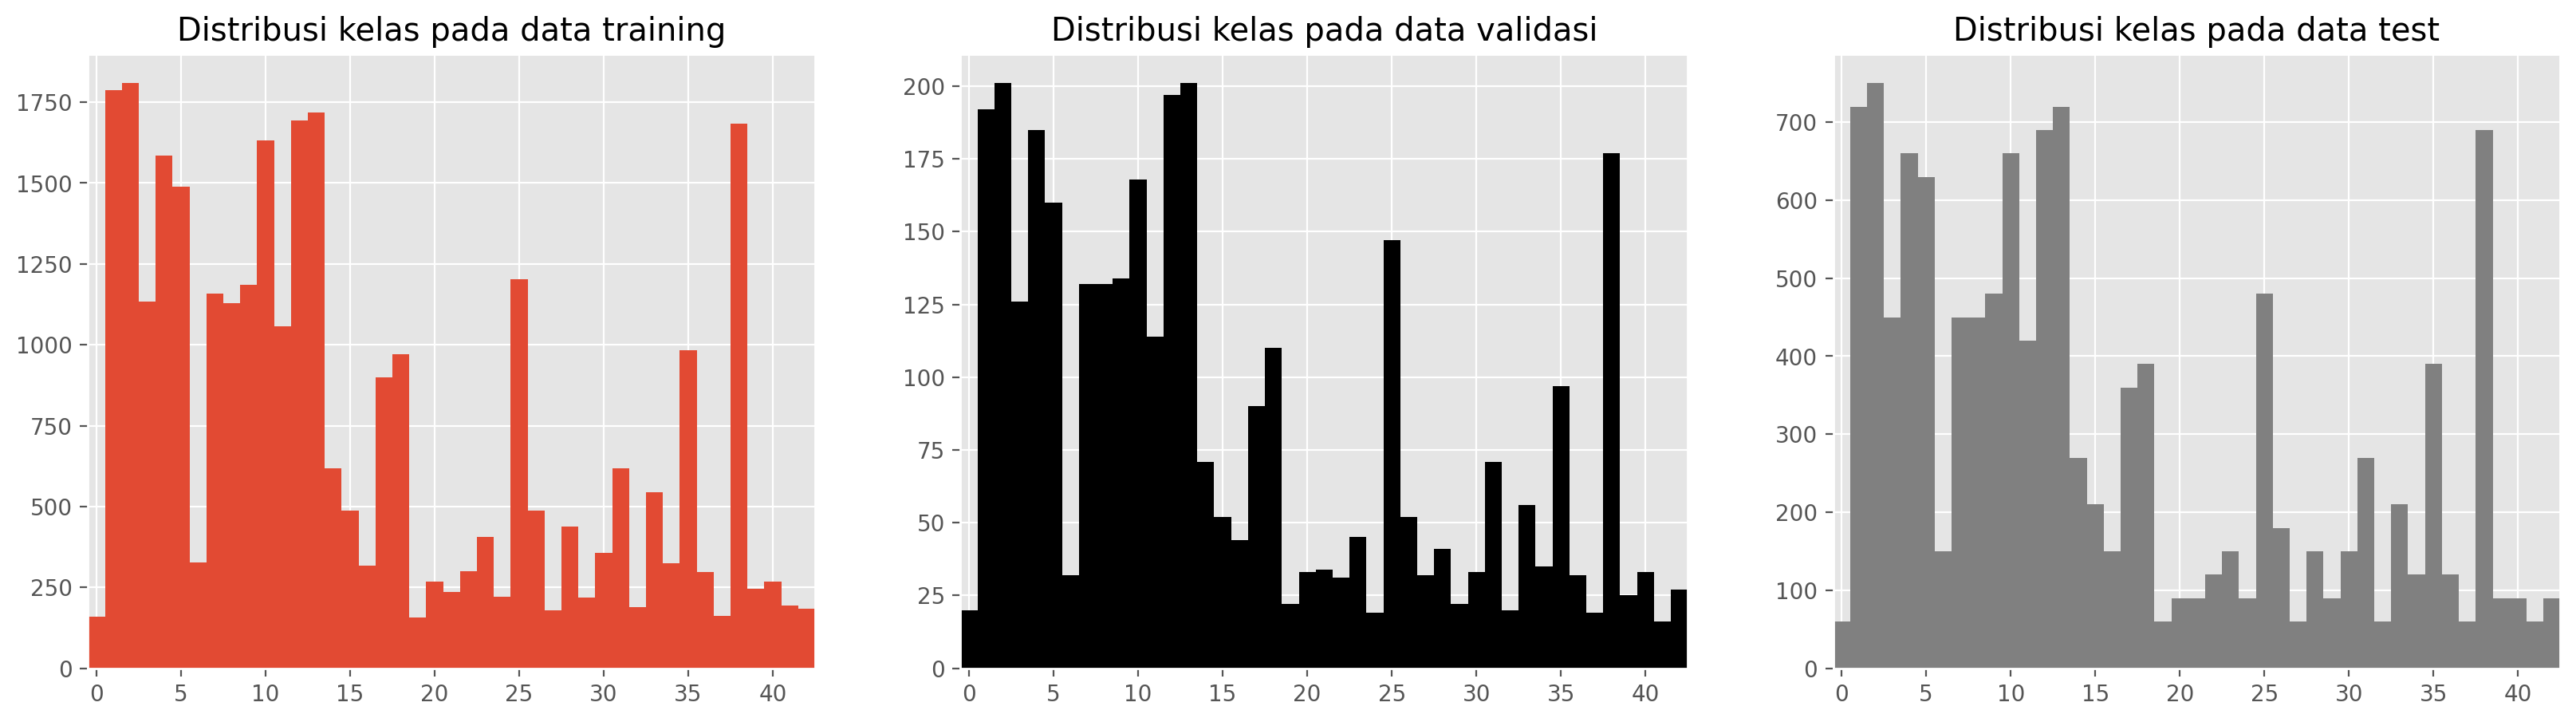

In [13]:
n_labels = np.unique(y_train).size

def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs:
        ax.legend()
    if title:
        ax.set_title(title)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

Program membuat histogram distribusi kelas pada data pelatihan, validasi, dan pengujian untuk memvisualisasikan sebaran kelas pada setiap subset data.

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Program mengubah label kelas menjadi representasi one-hot encoding untuk data pelatihan (y_train) dan data validasi (y_val), yang berguna dalam proses pelatihan dan evaluasi model.

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            print("\nAkurasi telah mencapai >96%. Stop training!")
            self.model.stop_training = True
callbacks = myCallback()

Program mendefinisikan sebuah callback kustom (myCallback) yang akan menghentikan proses pelatihan jika akurasi mencapai lebih dari 0.96.

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

Program membuat model neural network dengan arsitektur yang terdiri dari lapisan-lapisan Conv2D, MaxPool2D, Dropout, Flatten, dan Dense untuk digunakan dalam pelatihan dan evaluasi pada tugas yang relevan.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

Program menampilkan informasi tentang setiap lapisan dalam model, termasuk jenis lapisan, bentuk output dari setiap lapisan, dan jumlah parameter yang dapat dipelajari dalam model.

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Program mengatur konfigurasi pelatihan model dengan fungsi loss categorical_crossentropy, optimizer adam, dan metrik evaluasi accuracy.

In [19]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/25
979/979 [==============================] - 13s 7ms/step - loss: 1.7486 - accuracy: 0.5695 - val_loss: 0.3321 - val_accuracy: 0.9198
Epoch 2/25
979/979 [==============================] - 6s 6ms/step - loss: 0.4764 - accuracy: 0.8629 - val_loss: 0.1323 - val_accuracy: 0.9641
Epoch 3/25
979/979 [==============================] - 7s 7ms/step - loss: 0.3173 - accuracy: 0.9073 - val_loss: 0.1039 - val_accuracy: 0.9718
Epoch 4/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2570 - accuracy: 0.9285 - val_loss: 0.0897 - val_accuracy: 0.9796
Epoch 5/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2273 - accuracy: 0.9362 - val_loss: 0.0859 - val_accuracy: 0.9828
Epoch 6/25
979/979 [==============================] - 7s 7ms/step - loss: 0.2078 - accuracy: 0.9409 - val_loss: 0.0692 - val_accuracy: 0.9859
Epoch 7/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2145 - accuracy: 0.9428 - val_loss: 0.0639 - val_accuracy: 0.9848
Epoch

Pelatihan dilakukan selama 25 epoch dengan ukuran batch 32. Hasil pelatihan, termasuk riwayat metrik dan loss, disimpan dalam variabel history.

In [20]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Menyimpan model yang telah dilatih ke dalam file dengan format h5.

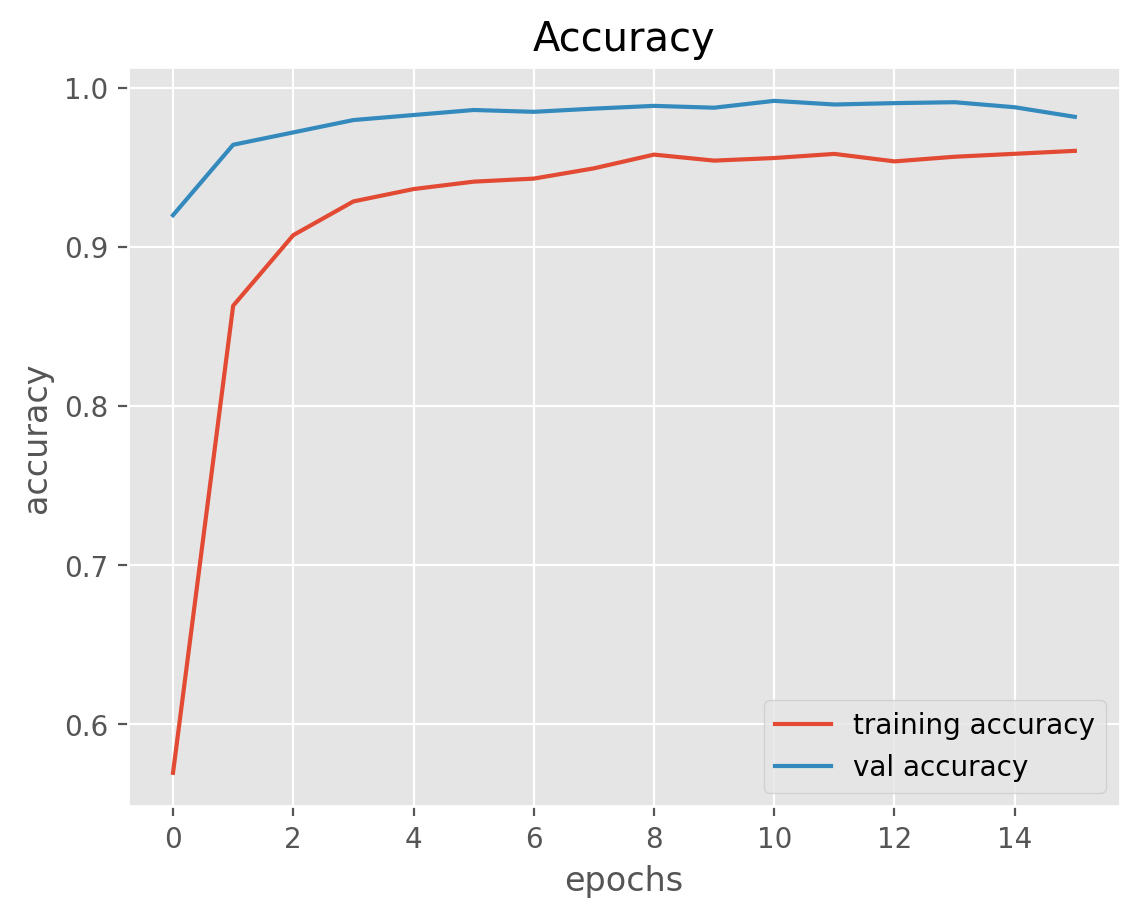

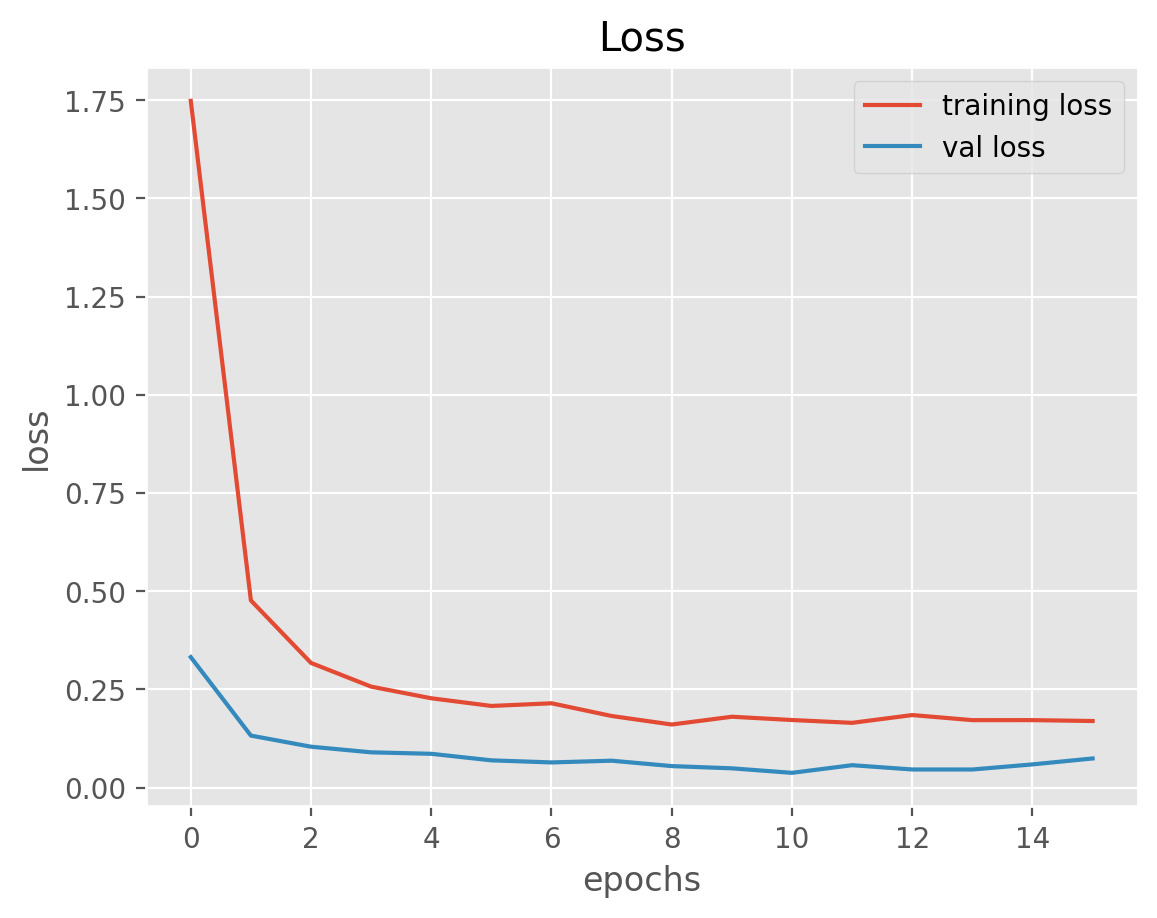

In [21]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Grafik pertama akan menampilkan grafik akurasi pelatihan (training accuracy) dan akurasi validasi (val accuracy) sepanjang epoch. Grafik ini akan memiliki label sumbu x "epochs" dan label sumbu y "accuracy".
Grafik kedua akan menampilkan grafik loss pelatihan (training loss) dan loss validasi (val loss) sepanjang epoch. Grafik ini akan memiliki label sumbu x "epochs" dan label sumbu y "loss".

In [22]:
from sklearn.metrics import accuracy_score

pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

395/395 [==============================] - 1s 2ms/step


0.9524148851939825

Program melakukan perhitungan akurasi prediksi model pada data uji.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.92      0.95      0.94       720
           2       0.96      0.98      0.97       750
           3       0.91      0.95      0.93       450
           4       0.95      0.97      0.96       660
           5       0.93      0.95      0.94       630
           6       0.98      0.83      0.90       150
           7       0.95      0.92      0.93       450
           8       0.92      0.91      0.92       450
           9       0.97      1.00      0.98       480
          10       1.00      0.98      0.99       660
          11       0.93      0.90      0.92       420
          12       0.99      0.98      0.99       690
          13       0.99      0.99      0.99       720
          14       0.99      1.00      0.99       270
          15       0.98      0.99      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

Program digunakan untuk menghasilkan laporan klasifikasi yang membandingkan label sebenarnya y_test dengan prediksi pred. Laporan ini akan mencakup metrik evaluasi untuk setiap kelas yang ada dalam data uji.